In [27]:
import sys
sys.path.append('../src')
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ODE_solver import ode_sistema
import ODE_solver
import importlib
from scipy.interpolate import interp1d
from scipy import signal

def full_potencial(y, lam, v, xi, Mp): 
    return (Mp**4*lam/4)*((1/xi)*np.exp(2*y) - vtilde**2)**2/(1 + np.exp(2*y))**2

def h_potencial(h, lam, v):
    return (lam/4)*(h**2 - v**2)**2/(1+ 10*h**2)**2

def large_potencial(y):
    return 10*(1 + np.exp(-2*y))**(-2)

def potencial_aproximado(y):
    return 0.5*(1 -2*np.exp(-2*y))

In [28]:

importlib.reload(ODE_solver)

<module 'ODE_solver' from 'c:\\Users\\diego\\OneDrive\\Documentos\\Universidad\\Cosmologia\\Efolds\\ODE_solver.py'>

In [31]:
vtilde**2

1.105304656173446e-32

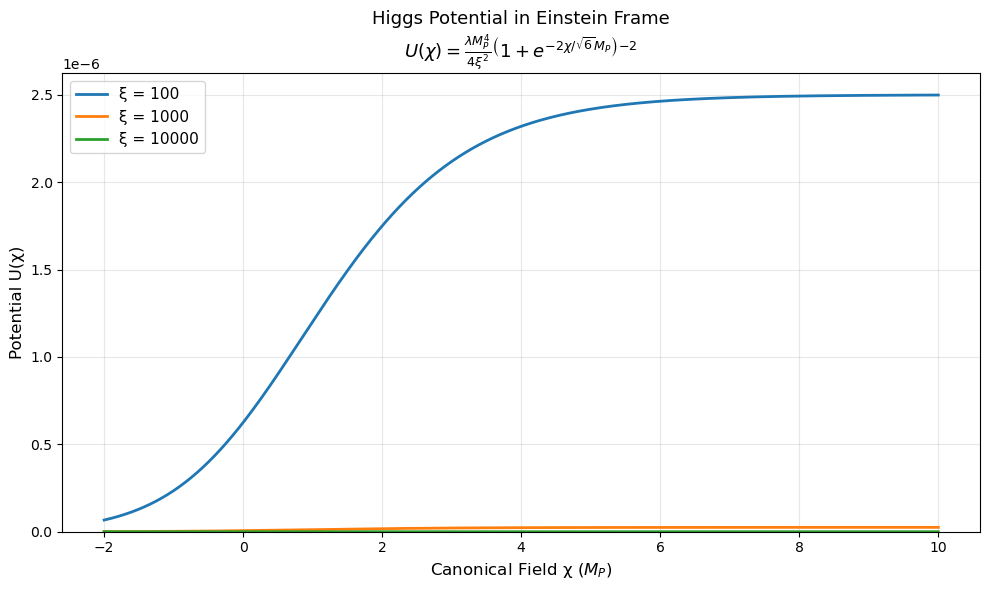

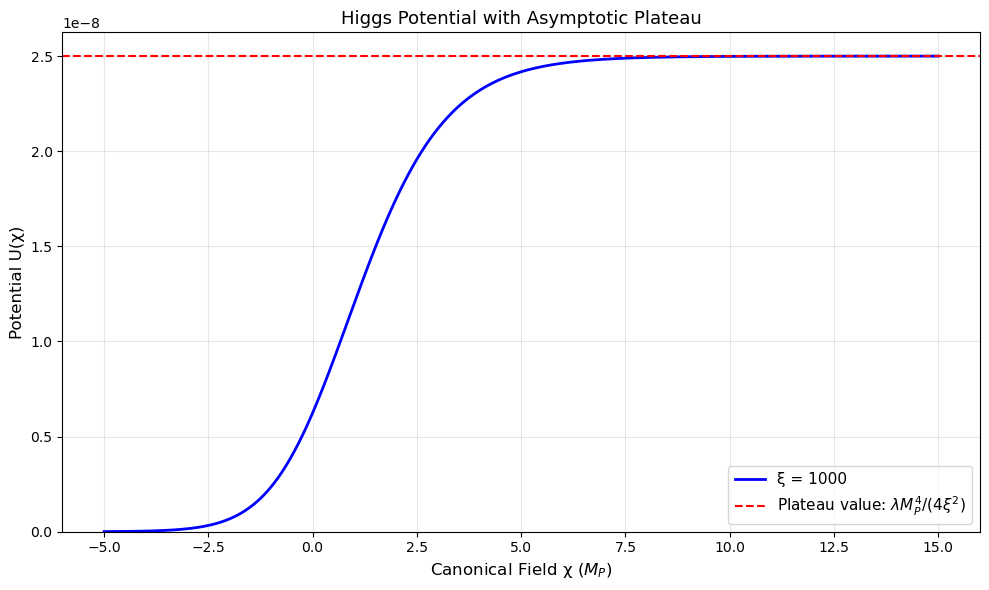

Key potential values:
For λ = 0.1, ξ = 1000:
Plateau value (χ → -∞): 2.50e-08
Value at χ = 0: 6.25e-09
Value at χ = 5: 2.42e-08


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def higgs_potential(chi, lambda_param=0.1, xi=1000, M_P=1):
    """
    Calculate the Higgs potential in the Einstein frame
    
    Parameters:
    chi: Canonical field value (can be array)
    lambda_param: Higgs self-coupling parameter
    xi: Non-minimal coupling parameter  
    M_P: Planck mass (set to 1 for natural units)
    """
    exponent = -2 * chi / (np.sqrt(6) * M_P)
    denominator = 1 + np.exp(exponent)
    return (lambda_param * M_P**4 / (4 * xi**2)) * (1 / denominator)**2

# Set parameters
lambda_param = 0.1  # Typical Higgs self-coupling
xi_values = [100, 1000, 10000]  # Different non-minimal coupling values
M_P = 1  # Planck mass (set to 1)

# Create field range
chi = np.linspace(-2, 10, 1000)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for different xi values
for xi in xi_values:
    U = higgs_potential(chi, lambda_param, xi, M_P)
    plt.plot(chi, U, label=f'ξ = {xi}', linewidth=2)

plt.xlabel('Canonical Field χ ($M_P$)', fontsize=12)
plt.ylabel('Potential U(χ)', fontsize=12)
plt.title('Higgs Potential in Einstein Frame\n$U(χ) = \\frac{\\lambda M_P^4}{4\\xi^2} \\left(1 + e^{-2χ/\\sqrt{6}M_P}\\right)^{-2}$', 
          fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(bottom=0)  # Potential is always positive
plt.tight_layout()
plt.show()

# Additional plot: Show the asymptotic behavior
plt.figure(figsize=(10, 6))

chi_extended = np.linspace(-5, 15, 1000)
xi = 1000
U_extended = higgs_potential(chi_extended, lambda_param, xi, M_P)

plt.plot(chi_extended, U_extended, 'b-', linewidth=2, label=f'ξ = {xi}')
plt.axhline(y=lambda_param/(4*xi**2), color='red', linestyle='--', 
           label='Plateau value: $\\lambda M_P^4/(4\\xi^2)$')
plt.xlabel('Canonical Field χ ($M_P$)', fontsize=12)
plt.ylabel('Potential U(χ)', fontsize=12)
plt.title('Higgs Potential with Asymptotic Plateau', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Print some key values
print("Key potential values:")
print(f"For λ = {lambda_param}, ξ = {xi}:")
print(f"Plateau value (χ → -∞): {lambda_param/(4*xi**2):.2e}")
print(f"Value at χ = 0: {higgs_potential(0, lambda_param, xi, M_P):.2e}")
print(f"Value at χ = 5: {higgs_potential(5, lambda_param, xi, M_P):.2e}")

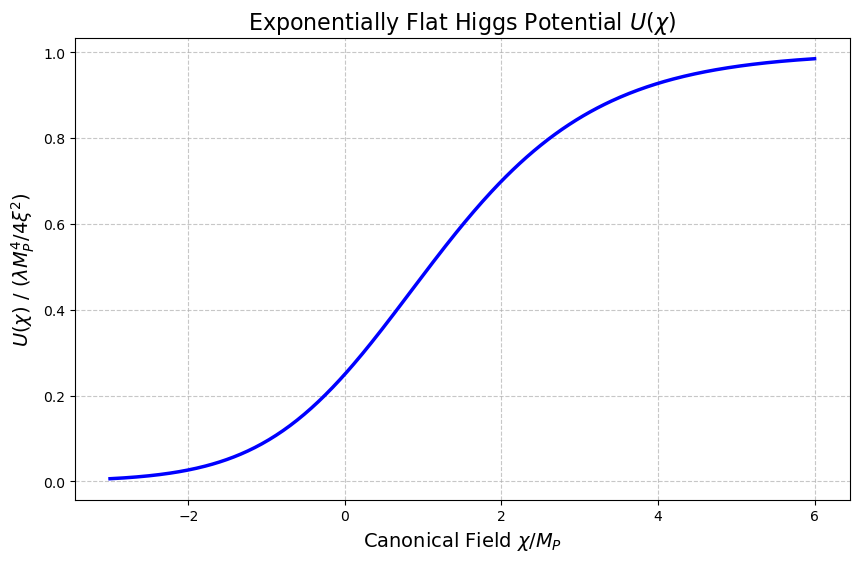

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_higgs_potential():
    """
    Plots the exponentially flat Higgs potential U(chi)
    from the provided formula.
    """
    
    # --- Parameters ---
    # We will plot the field chi in units of M_p, so we set M_p = 1.
    M_p = 1.0
    
    # We will plot the normalized potential U(chi) / (prefactor),
    # so we can set the prefactor to 1.
    # prefactor = (lambda_val * M_p**4) / (4 * xi**2)
    
    # --- Define the Potential Function ---
    # This is the normalized potential from your image
    def U_normalized(chi, Mp):
        exponent = -2.0 * chi / (np.sqrt(6.0) * Mp)
        return (1.0 + np.exp(exponent))**(-2.0)

    # --- Generate Data ---
    # Create an array for chi, from -3 M_p to 6 M_p
    # This range shows the flat "plateau" and the "cliff"
    chi = np.linspace(-3 * M_p, 6 * M_p, 400)
    
    # Calculate the potential U for each value of chi
    potential = U_normalized(chi, M_p)

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    plt.plot(chi, potential, lw=2.5, color='blue')
    
    # --- Labels and Titles (using LaTeX) ---
    plt.title(r"Exponentially Flat Higgs Potential $U(\chi)$", fontsize=16)
    
    # Label the x-axis as chi in units of M_p
    plt.xlabel(r"Canonical Field $\chi / M_P$", fontsize=14)
    
    # Label the y-axis as the normalized potential
    plt.ylabel(r"$U(\chi) \ / \ (\lambda M_P^4 / 4\xi^2)$", fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Run the function to create the plot
plot_higgs_potential()

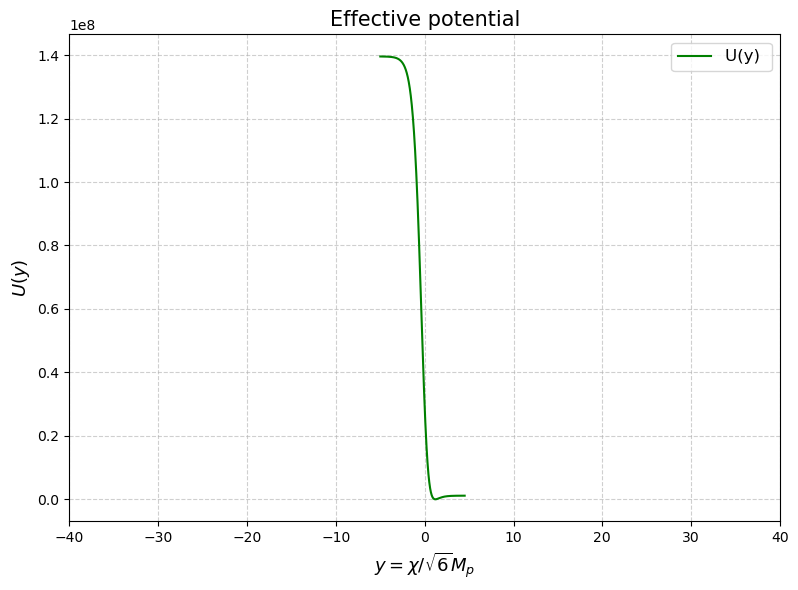

In [29]:

lam = 0.13
Mp = 2.435e18 # GeV
#Mp = 1
vtilde = 256/Mp
xi = 1e33
 
y0, v0 = 4.5, -0.25
tc = xi/(Mp*np.sqrt(lam))

y_span = np.linspace(-5, y0, 1000)

plt.figure(figsize=(8, 6))
#plt.axis(ymin=0, ymax=0.2*1e7) 
plt.xlabel(r"$y = \chi / \sqrt{6}M_p$", fontsize=13)
plt.plot(y_span, full_potencial(y_span, lam, v, xi, Mp), 'g-', label="U(y) ")
plt.ylabel(r"$U(y)$", fontsize=13)
plt.title("Effective potential", fontsize=15)
plt.grid(True, ls='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlim(-40, 40)
plt.savefig(f'../images/figuras/potencial_y0={y0}.png')
plt.show()

In [721]:

t_span = (0,5000)
sol = solve_ivp(ode_sistema, t_span, [y0, v0], method='BDF',  dense_output=True)  # Solución numérica

tau = np.linspace(t_span[0],t_span[1], t_span[1]*10)

y, vel = sol.sol(tau)[0], sol.sol(tau)[1]  # Guardamos la solución numérica para el campo y su derivada.
potencial = full_potencial(y, lam, v, xi, Mp)

In [722]:
damping = 3*xi*vel*np.sqrt( (1/12)* ( (np.exp(2*y)/xi - v**2)**2 / (1 + np.exp(2*y))**2)  + (vel**2)/xi**2)
forcing = (1/6)*( np.exp(2*y)*(np.exp(2*y) - xi*v**2)*(1+xi*v**2) )/(1 + np.exp(2*y))**3
acc = -damping - forcing # Obtenemos la solución numérica para la segunda derivada del campo.

In [723]:
# Guardar Datos

np.savez('../data/solution_dense.npz',
         tau=tau,
         y=y,
         vel=vel,
         # Parameters
         lam=lam,
         v=v,
         xi=xi,
         Mp=Mp,
         y0=y0,
         v0=v0,
         t_span=t_span,
         # Store the original solution points too
         y_original=sol.sol(tau)[0],
         vel_original=sol.sol(tau)[1])



# Leer datos

data = np.load('../data/solution_dense.npz')

tau = data['tau']
y = data['y']
vel = data['vel']


y_interp = interp1d(tau, y, kind='cubic')
vel_interp = interp1d(tau, vel, kind='cubic')


In [724]:
min_potential_index = np.argmin(potencial)
y_min_potential = y[min_potential_index]
potential_min_value = potencial[min_potential_index]
tau_end = tau[min_potential_index]


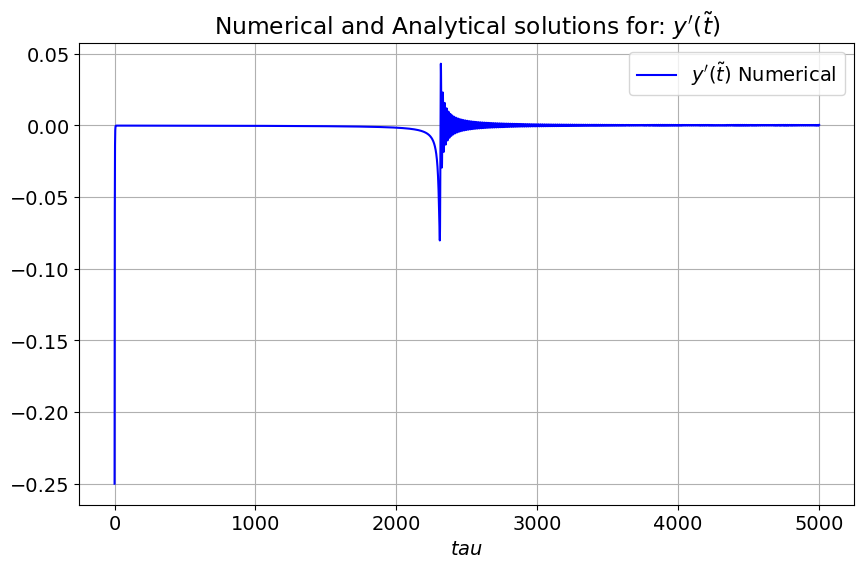

In [725]:
plt.figure(figsize=(10, 6))
plt.plot(tau,vel_interp(tau), 'b-', label=r"$y^\prime(\tilde{t})$ Numerical")
plt.legend(loc="upper right")
#plt.xlim(0,100000)
plt.xlabel(r"$tau$")
plt.grid(True)
plt.title(r'Numerical and Analytical solutions for: $y^\prime(\tilde{t})$')
plt.show()

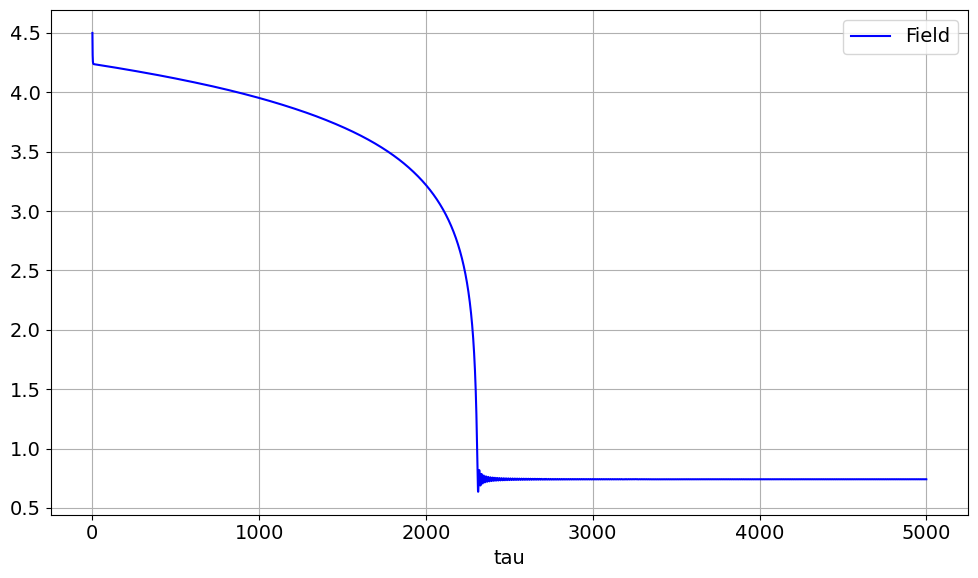

In [726]:
plt.figure(figsize=(10, 6))
plt.plot(tau, y_interp(tau), 'b-', label=r"Field")
#plt.xlim(0,5000)
#plt.ylim(-1, 4.5)  
plt.xlabel(r"tau")
plt.ylabel('')
#plt.title(r'Numerical solutions for: $y(\tilde{t})$, $y^\prime(\tilde{t})$, and $y^{\prime\prime}(\tilde{t})$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Graphs as function of y

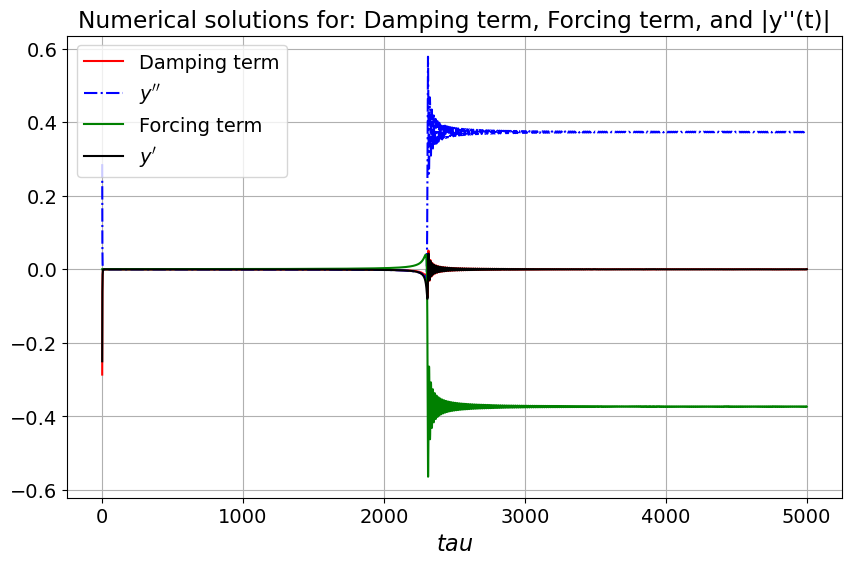

In [727]:
plt.figure(figsize=(10, 6))
plt.plot(tau, (damping), 'r', label="Damping term")
plt.plot(tau, (acc), 'b-.', label=r"$y^{\prime\prime}$")
plt.plot(tau, (forcing), 'g', label="Forcing term")
plt.plot(tau, (vel), 'k-', label=r"$y^\prime$")
plt.title('Numerical solutions for: Damping term, Forcing term, and |y\'\'(t)|')
#plt.xlim(0,100)
#plt.ylim(-0.002, 0.002)  
plt.legend()
plt.xlabel(r"$tau$", fontsize=16)
plt.grid()
plt.show()

### Start and ending of inflation 

Para el inicio de inflación necesitamos que la densidad de energía potencial sea mucho mayor a la cinética.

Para el fin de inflación y comienzo de reheating necesitamos que la densidad de energía cinética sea comparable a la potencial o en otros términos, el parámetro de slow roll $\epsilon = 1$.


In [728]:
from scipy.signal import savgol_filter

H = np.sqrt(lam)*Mp*np.sqrt((1/xi**2)*vel**2 + (((1/xi)*np.exp(2*y) - v**2)**2/(1 + np.exp(2*y))**2)/(12)) # Unidades de 1/t= m
# Smooth H before taking derivatives
H_smooth = savgol_filter(H, window_length=101, polyorder=3)
dH_dtau  = np.gradient(H_smooth, tau)
d2H_dtau2 = np.gradient(dH_dtau, tau)

epsilon1 = -dH_dtau/(H**2*tc) # Parámeteo de slow roll
epsilon2 = -6 -(2*np.sqrt(lam)*Mp/(vel*H*xi))*forcing + 2*epsilon1

epsilon2 = d2H_dtau2/(H*dH_dtau*tc) +2*epsilon1
#epsilon2_smooth = savgol_filter(epsilon2, window_length=9, polyorder=2)

In [729]:

target_value = -6
tolerance = 0.5  

# Find indices where epsilon2 is around -6 in the USR region
usr_indices = np.where((tau >= 5) & (tau <= 12))[0]


epsilon2_usr = epsilon2[usr_indices]
tau_usr = tau[usr_indices]

indices_around_minus_six = np.where(np.abs(epsilon2_usr - target_value) <= tolerance)[0]

# Get the corresponding tau values
tau_around_minus_six = tau_usr[indices_around_minus_six]
epsilon2_around_minus_six = epsilon2_usr[indices_around_minus_six]

print(f"Found {len(tau_around_minus_six)} points where epsilon2 ≈ -6 in USR region:")
#for t, e in zip(tau_around_minus_six, epsilon2_around_minus_six):
#    print(f"tau = {t:.4f}, epsilon2 = {e:.4f}")

# If you want ALL points in the entire range (not just USR region):
#all_indices_around_minus_six = np.where(np.abs(epsilon2 - target_value) <= tolerance)[0]
#tau_all_around_minus_six = tau[all_indices_around_minus_six]
#epsilon2_all_around_minus_six = epsilon2[all_indices_around_minus_six]

#print(f"\nFound {len(tau_all_around_minus_six)} points where epsilon2 ≈ -6 in entire range:")
#for t, e in zip(tau_all_around_minus_six, epsilon2_all_around_minus_six):
#    print(f"tau = {t:.4f}, epsilon2 = {e:.4f}")

Found 38 points where epsilon2 ≈ -6 in USR region:


In [730]:
fig_usr_detailed = plt.figure(figsize=(12, 4))
ax_usr_detailed = fig_usr_detailed.add_subplot(111)
ax_usr_detailed.axis('off')

# Create detailed text with USR range and epsilon2 ≈ -6 points
target_value = -6
tolerance = 0.1
usr_indices = np.where((tau >= x1) & (tau <= x2))[0]
epsilon2_usr = epsilon2[usr_indices]
tau_usr = tau[usr_indices]
indices_around_minus_six = np.where(np.abs(epsilon2_usr - target_value) <= tolerance)[0]
tau_around_minus_six = tau_usr[indices_around_minus_six]

detailed_text = f"USR Region Analysis\n\n"
detailed_text += f"Parameters: N={N:.1f}, y0={y0}, v0={v0}\n"
detailed_text += f"USR τ range: [{x1}, {x2}]\n"
detailed_text += f"Tolerance for ε₂ ≈ -6: ±{tolerance}\n"
detailed_text += f"Points where ε₂ ≈ -6 in USR region: {len(tau_around_minus_six)}\n"
if len(tau_around_minus_six) > 0:
    detailed_text += f"τ values: {', '.join([f'{t:.4f}' for t in tau_around_minus_six])}"

ax_usr_detailed.text(0.5, 0.5, detailed_text, fontsize=12, ha='center', va='center', 
                     bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
                     linespacing=1.5)

# Create filename with all parameters including tolerance
filename = f"USR_analysis_N={N:.1f}_y0={y0}_v0={v0}_tol={tolerance}.png"

plt.tight_layout()
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.close(fig_usr_detailed)

print(f"Detailed USR analysis saved to '{filename}'")

Detailed USR analysis saved to 'USR_analysis_N=60.0_y0=4.5_v0=-0.25_tol=0.1.png'


In [731]:
# Enhanced version with points where epsilon2 ≈ -6
fig_usr_detailed = plt.figure(figsize=(12, 4))
ax_usr_detailed = fig_usr_detailed.add_subplot(111)
ax_usr_detailed.axis('off')

# Create detailed text with USR range and epsilon2 ≈ -6 points
target_value = -6
tolerance = 0.1
usr_indices = np.where((tau >= x1) & (tau <= x2))[0]
epsilon2_usr = epsilon2[usr_indices]
tau_usr = tau[usr_indices]
indices_around_minus_six = np.where(np.abs(epsilon2_usr - target_value) <= tolerance)[0]
tau_around_minus_six = tau_usr[indices_around_minus_six]

detailed_text = f"USR Region Analysis\n\n"
detailed_text += f"USR τ range: [{x1}, {x2}]\n"
detailed_text += f"Points where ε₂ ≈ -6 in USR region: {len(tau_around_minus_six)}\n"
if len(tau_around_minus_six) > 0:
    detailed_text += f"τ values: {', '.join([f'{t:.4f}' for t in tau_around_minus_six])}"

ax_usr_detailed.text(0.5, 0.5, detailed_text, fontsize=12, ha='center', va='center', 
                     bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
                     linespacing=1.5)

plt.tight_layout()
plt.savefig('../images/USR_region_analysis.png', dpi=150, bbox_inches='tight')
plt.close(fig_usr_detailed)

print(f"Detailed USR analysis saved to '../images/USR_region_analysis.png'")

Detailed USR analysis saved to '../images/USR_region_analysis.png'


In [732]:
# Criterio para comienzo de inflación
start_condition = epsilon1 < 1 # Condiciones para slow roll
#start_condition_v = epsilon_v < 1
t0 = tau[start_condition][0]  
t0


end_condition =  epsilon1 > 1
#end_condition_v = epsilon_v > 1


In [733]:
t_end = tau[end_condition][0]
#t_end_v = tau[end_condition_v][0]

t0, t_end

(np.float64(0.0), np.float64(2299.0459809196186))

In [734]:
y_start = y[start_condition][0]
y_end = y[end_condition][0]
#y_end_v = y[end_condition_v][0]
y_start, y_end

(np.float64(4.5), np.float64(1.4555750724068357))

In [735]:
plt.rcParams['agg.path.chunksize'] = 100

NameError: name 'kinetic' is not defined

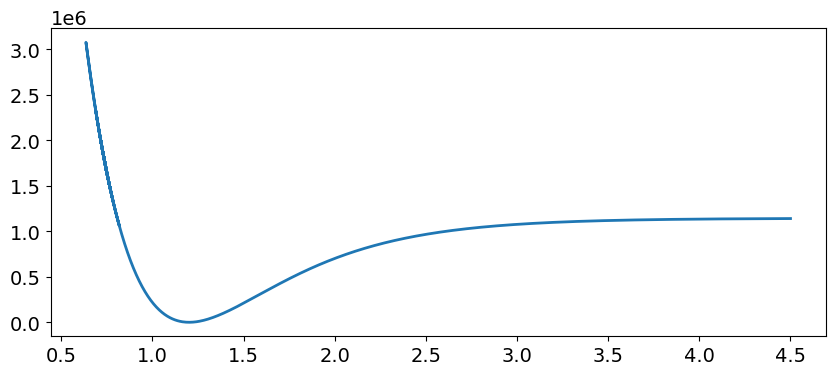

In [736]:
plt.figure(figsize=(10, 4))
plt.plot(y, potencial, label=r'$U(y)$', lw=2)
plt.plot(y, kinetic, label='Kinetic energy', lw=2)

# Key epochs
plt.axvline(y0, color='g', linestyle='--', label='Inflation start')
plt.axvline(y_star, color='purple', linestyle='--', label='CMB Horizon crossing')
plt.axvline(y_end, color='r', linestyle='--', label=r'Inflation end  $\epsilon_1 \sim \mathcal{O}(1)$')

# === Keep axes but remove numeric ticks ===
ax = plt.gca()
ax.set_xticks([])        # remove tick labels and marks on x-axis
ax.set_yticks([])        # remove tick labels and marks on y-axis
ax.tick_params(length=0) # removes small tick marks

# Keep spines (axis lines) visible
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.1)

# Limits and labels
plt.xlim(0, 5.5)
plt.xlabel(r"$y$", fontsize=14)
plt.ylabel(r"Energy density", fontsize=14)

plt.legend(loc='upper right', bbox_to_anchor=(0.9, 1))
plt.tight_layout()
plt.show()


In [737]:
def calcular_efolds(t_star_candidato):
    mask = (tau >= t_star_candidato) & (tau <= t_end)  
    H_dominio = H[mask]
    tau_segment = tau[mask]
    N_int = np.trapezoid(H_dominio, tau_segment)
    return tc * N_int

target_N = 60

# range de busqueda
t_low = t0  
t_high = t_end  

tolerancia = 1e-2
max_iter = 50

for i in range(max_iter):
    t_mid = (t_low + t_high) / 2
    current_N = calcular_efolds(t_mid)
    
    if abs(current_N - target_N) < tolerancia:
        t_star = t_mid 
        break
    elif current_N < target_N:
        t_high = t_mid
    else:
        t_low = t_mid
        
    if i == max_iter - 1:
        t_star = t_mid
        print(f"Máximo de iteraciones alcanzadas. Mejor t* = {t_star}")

mask_verify = (tau >= t_star) & (tau <= t_end)
N_verify = tc * np.trapezoid(H[mask_verify], tau[mask_verify])
print(f"N* desde t* hasta t_end = {N_verify}")



N* desde t* hasta t_end = 59.995244554462886


In [738]:
mask_cmb = (tau >= t_star) & (tau <= t_end)
tau_inf = tau[mask_cmb]
H_inf = H[mask_cmb]

mask_inf = (tau >= t0) & (tau <= t_end)
tau_inf_total = tau[mask_inf]
H_inf_total = H[mask_inf]

N_int = np.trapezoid(H_inf, tau_inf)
N = tc*N_int
N_total = tc*np.trapezoid(H_inf_total, tau_inf_total)
# Print Number of efolds
print(f"Numero de efolds N: {N} (desde tau = {t_star} a tau = {t_end})")
print(f"Numero de efolds N_total: {N_total} (desde tau = {t0} a tau = {t_end})")
#print(f"Numero de efolds N: {N} (desde y0 = {y0} a y* = {y_star})")
#print(f"Numero de efolds N_v: {N_v} (desde tau = {t_star} a tau = {t_end_v})")

Numero de efolds N: 59.995244554462886 (desde tau = 2071.4426739706673 a tau = 2299.0459809196186)
Numero de efolds N_total: 654.1953808060861 (desde tau = 0.0 a tau = 2299.0459809196186)


In [739]:
idx_star = np.argmin(np.abs(tau - t_star))
epsilon1_star = epsilon1[idx_star]
epsilon2_star = epsilon2[idx_star]
H_star = H[idx_star]
y_star = y[idx_star]
tau_star = tau[idx_star]
print(f"Parámetros al cruzar el horizonte: ε* = {epsilon1_star}, ε2* = {epsilon2_star}")
print(f"Observables: ns = {1 - 4*epsilon1_star + 2*epsilon2_star}, r = {16*epsilon1_star}")
#print(f"Observables: ns_v = {1 - 6*epsilon_v_star + 2*eta_star}, r_v = {16*epsilon_v_star} ")

Parámetros al cruzar el horizonte: ε* = 0.0003940976126046159, ε2* = 0.03231636943491244
Observables: ns = 1.0630563484194064, r = 0.006305561801673854


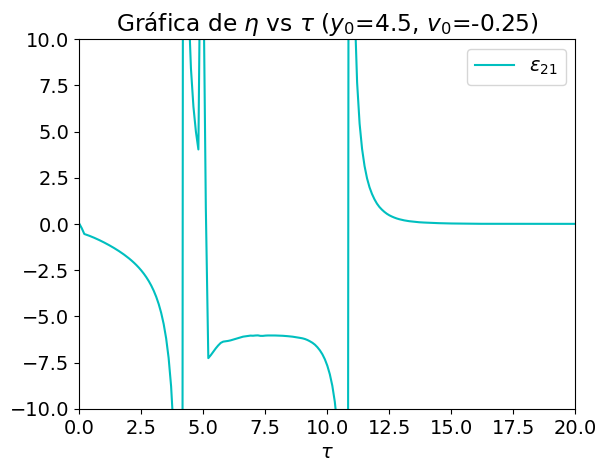

In [740]:
plt.title(r'Gráfica de $\eta$ vs $\tau$ ($y_0$={}, $v_0$={})'.format(y0, v0))
#plt.plot(y, eta2, label=r'$\eta(H)$')
plt.plot(tau, epsilon2, color='c', label=r'$\epsilon_{21}$')
#plt.plot(tau, epsilon, color='y', label=r'$\epsilon$')
#plt.axvline(y_star, color='purple', linestyle='--', label='Horizon crossing')
#plt.axvline(y_end, color='r', linestyle='--', label='Inflation end')
plt.legend()
plt.xlim(0,20)
plt.ylim(-10,10)
#plt.yscale('log')
plt.xlabel(r"$\tau$")
#plt.savefig(f'../images/figuras/(N={N:.1f})eta-epsilon vs tau (y0={y0}, v0={v0}).png')
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_27040\3788971670.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


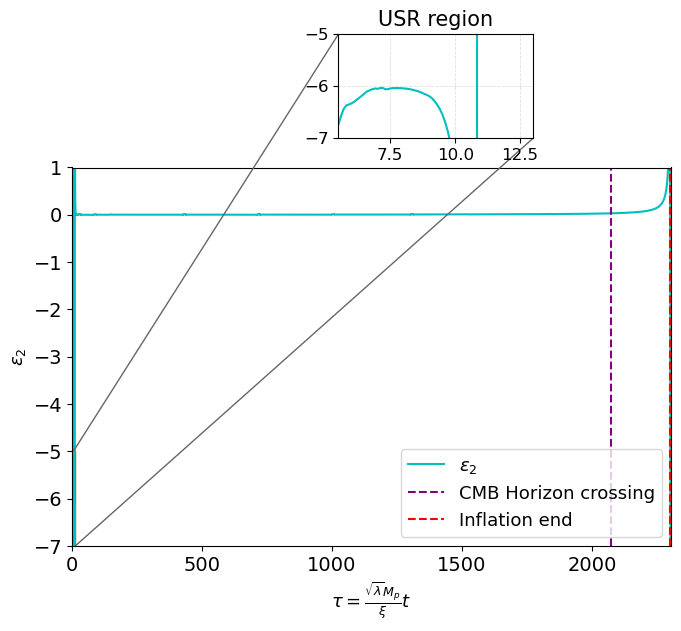

N= 59.995244554462886 v0= -0.25 y0= 4.5


In [741]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 13})
# === Main plot ===
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(tau, epsilon2, color='c', label=r'$\epsilon_{2}$')
ax.set_xlim(0, tau_end)
ax.set_ylim(-7, 1)
ax.set_xlabel(r"$\tau= \frac{\sqrt{\lambda}  M_p}{\xi} t$")
ax.set_ylabel(r"$\epsilon_2$")
ax.tick_params(axis='both', which='major', labelsize=14)
#vertial line on 
ax.axvline(t_star, color='purple', linestyle='--', label='CMB Horizon crossing')
ax.axvline(t_end, color='r', linestyle='--', label='Inflation end')
ax.legend(loc='lower right')


# === Define region to zoom ===
x1, x2 = 5.5, 13
y1, y2 = -7, -5  # vertical limits for the zoom

# === Create inset (zoom) ===
axins = inset_axes(ax, width="65%", height="55%", loc="upper right",
                   bbox_to_anchor=(0.30, 0.9, 0.5, 0.5),
                   bbox_transform=ax.transAxes, borderpad=1)

# Plot data inside inset
axins.plot(tau, epsilon2, color='c')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Add grid and axis labels with smaller font
axins.tick_params(axis='both', labelsize=12)
axins.grid(alpha=0.4, linestyle='--', linewidth=0.6)

# Optional: small title for inset
axins.set_title("USR region", fontsize=15)

# Highlight zoomed region on the main plot
ax.axvspan(x1, x2, color='gray', alpha=0.15)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.4", lw=1)
plt.tight_layout()
plt.savefig(f'../images/figuras/(N={N:.1f})epsilon2 vs tau (y0={y0}, v0={v0}).png', bbox_inches='tight', dpi=300)
plt.show()
print(f"N=",N,"v0=",v0,"y0=",y0)

<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
C:\Users\diego\AppData\Local\Temp\ipykernel_27040\1181804882.py:16: SyntaxWarning: invalid escape sequence '\e'
  f"$\epsilon_1^*$={epsilon1_star:.5f}, $\epsilon_2^*$={epsilon2_star:.5f}\n\n"
C:\Users\diego\AppData\Local\Temp\ipykernel_27040\1181804882.py:16: SyntaxWarning: invalid escape sequence '\e'
  f"$\epsilon_1^*$={epsilon1_star:.5f}, $\epsilon_2^*$={epsilon2_star:.5f}\n\n"


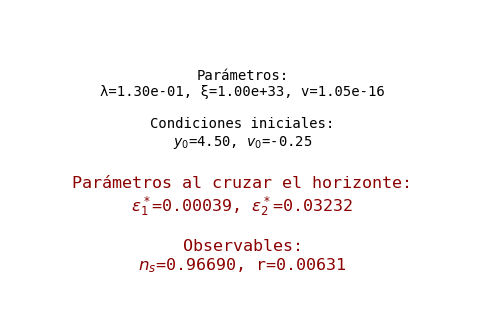

Figura guardada como: figuras/(N=60.0)params_lambda1.3e-01_xi1.0e+33_v1.1e-16_y04.5_v0-0.2.png


In [742]:
ns = 1 - 2*epsilon1_star - epsilon2_star
r = 16*epsilon1_star

fig, ax = plt.subplots(figsize=(6,4))
ax.axis('off')

text_params = (
    f"Parámetros:\n"
    f"λ={lam:.2e}, ξ={xi:.2e}, v={v:.2e}\n\n"
    f"Condiciones iniciales:\n"
    f"$y_0$={y0:.2f}, $v_0$={v0:.2f}\n"
)

text_obs = (
    f"Parámetros al cruzar el horizonte:\n"
    f"$\epsilon_1^*$={epsilon1_star:.5f}, $\epsilon_2^*$={epsilon2_star:.5f}\n\n"
    f"Observables:\n"
    f"$n_s$={ns:.5f}, r={r:.5f}"
)

ax.text(0.5, 0.65, text_params, ha='center', va='center', fontsize=10, family='monospace')

ax.text(0.5, 0.3, text_obs, ha='center', va='center', fontsize=12, family='monospace', color='darkred')

filename = f"figuras/(N={N:.1f})params_lambda{lam:.1e}_xi{xi:.1e}_v{v:.1e}_y0{y0:.1f}_v0{v0:.1f}.png"

plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figura guardada como: {filename}")


In [ ]:
print(f"Minimum of potential occurs at y = {y_min_potential:.4f}")
print(f"Minimum potential value = {potential_min_value:.4e}")

# Filter arrays to include only y values bigger than the potential minimum
mask = y > y_min_potential
y_filtered = y[mask]
epsilon2_filtered = epsilon2[mask]
epsilon1_filtered = epsilon1[mask]
potential_filtered = potencial[mask]  # if you want to plot potential too

# Also limit to first 1300 points as in your original code
max_points = min(1300, len(y_filtered))
y_plot = y_filtered[:max_points]
epsilon2_plot = epsilon2_filtered[:max_points]
epsilon1_plot = epsilon1_filtered[:max_points]

Minimum of potential occurs at y = 1.2038
Minimum potential value = 2.3560e+01


: 

Plotting from y = 4.0000 to y = 1.4555


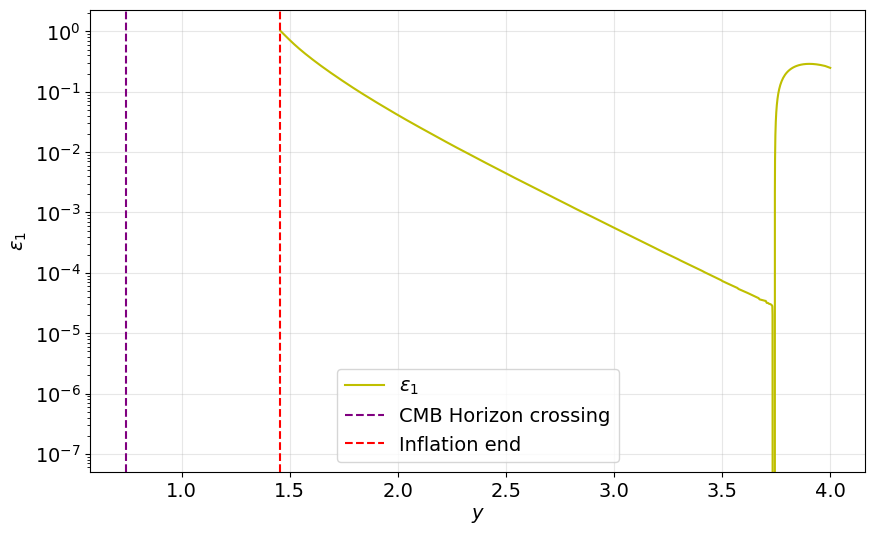

Plotted 8454 points from y_min = 1.2037 to y_end = 1.4555
y*=0.7403, y_end=1.4555


In [699]:
mask = (y > y_min_potential) & (y >= y_end)
y_filtered = y[mask]
epsilon2_filtered = epsilon2[mask]
epsilon1_filtered = epsilon1[mask]

print(f"Plotting from y = {y_filtered[0]:.4f} to y = {y_filtered[-1]:.4f}")

# Create the plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
#plt.title(r'Gráfica de ($\epsilon_2,\epsilon_1$) vs $y$ ($y_0$={}, $v_0$={})'.format(y0, v0))

#plt.plot(y_filtered, epsilon2_filtered, color='c', label=r'$\epsilon_2$')
plt.plot(y_filtered, epsilon1_filtered, color='y', label=r'$\epsilon_1$')

# Add vertical lines
plt.axvline(y_star, color='purple', linestyle='--', label='CMB Horizon crossing')
plt.axvline(y_end, color='r', linestyle='--', label='Inflation end')
#plt.axvline(y_min_potential, color='gray', linestyle=':', alpha=0.8, linewidth=2,
#            label=f'Potential minimum (y={y_min_potential:.4f})')

plt.legend()
plt.yscale('log')
plt.xlabel(r"$y$")
plt.ylabel(r"$\epsilon_1$")
plt.grid(True, alpha=0.3)

# Save the plot
plt.savefig(f'../images/figuras/(N={N:.1f})eta-epsilon vs y (y0={y0}, v0={v0})_min_to_end.png')
plt.show()

print(f"Plotted {len(y_filtered)} points from y_min = {y_min_potential:.4f} to y_end = {y_end:.4f}")
print(f"y*={y_star:.4f}, y_end={y_end:.4f}")